## `bracket_of()` Function
The function `bracket_of()` is helpful to find a suitable bracket for bracketing algorithms such as Bisection or False Position.

It basically starts from the origin of the function and iterates through x's with a determined step until it finds two points between which the function changes sign.

In [ ]:
def bracket_of(f, x=0, s=1e-1, k=2.0, ops=1000):
    """
    Finds the bracket of a function.

    Parameters:
        f (function): The function for which the bracket is to be found.
        x (float, optional): The initial guess for the bracket. Defaults to 0.
        s (float, optional): The step size for the bracket. Defaults to 1e-2.
        k (float, optional): The scaling factor for the bracket. Defaults to 2.0.
        ops (int, optional): The maximum number of iterations for the bracket. Defaults to 1000.

    Returns:
        tuple: A tuple containing the lower and upper bounds of the bracket.
    """
    a, fa = x, f(x)
    b, fb = a + s, f(a + s)
    if fb > fa:
        a, b = b, a
        fa, fb = fb, fa
        s = -s
    for _ in range(ops):
        c, fc = b + s, f(b + s)
        if fc * fb < 0:
            return (round(a, 1),round(c, 1))if a < c else(round(c,1),round(a,1))
        a, fa, b, fb = b, fb, c, fc
        s *= k

## `plot_of()` Function
The function `plot_of()` prints on the terminal a plot representing the function and the two points of the bracket, in red.

You can decide, in the parameter, the `zoom` level of the plot, of which 0 is the width of the bracket and 5 is with a 5-span from the bracket.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_of(f, zoom=1):
  """
  Prints the plot and the bracketing points of a function

  Parameters:
      f (function): The function for which to plot and bracket
      zoom (int, optional): zoom level on the plot (0: smallest, n: biggest)
  """
  bracket = bracket_of(f)
  x = np.linspace(bracket[0] - zoom, bracket[1] + zoom, 1000)
  y = f(x)
  df = pd.DataFrame(zip(x, y), columns=['x', 'y=f(x)']).set_index('x')
  fig, ax = plt.subplots()

  # Plot sns.lineplot() to the ax
  sns.set_palette('Set2')
  sns.set_style('whitegrid')
  sns.lineplot(df, ax=ax)
  ax.set_title('Bracket', size=11)
  ax.set_xlim(bracket[0] - zoom, bracket[1] + zoom)
  ax.set_ylim(-10, 20)

  # Despine the graph
  sns.despine()
  plt.scatter(bracket, (0,0), color='red')
  plt.show()

## Usage
To use the `plot_of()` function you have to provide a `lambda` expression with the function of x. You can optionally define the zoom level, which is default = 1.

For the function `bracket_of()` you must provide a `lambda` expression, in the same way you did for `plot_of()`. You can optionally provide the starting point (default = 0), the step size (default = 1e-1) the scaling factor of the bracket (default = 2.0) and the maximum number of operations you want the function to execute (default = 1000).

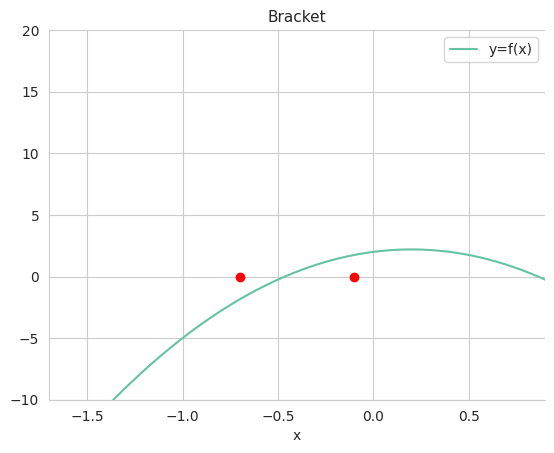

Bracket:  (-0.7, -0.1)


In [140]:
# Example with function -5x^2 + 2x + 2
plot_of(lambda x: -5*x**2 + 2*x + 2)
print("Bracket: ", bracket_of(lambda x: -5*x**2 + 2*x + 2))